## Exercise 2: Correlations and preprocessing

Before we start applying machine learning algorithms, we want to have a look at further preprocessing and analyzing steps. To do so, this exercise will mainly deal with scaling, dimensionality reduction, correlation measures and the distribution of data points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('fifa1.csv')

### correlation vs. causality

A common step in data analytics is to investigate correlations between variables. Sometimes these correlations might or might not be derivable from obvious causalities. Create scatter plots of the feature pair 'Ball control' and 'Dribbling' and the feature pair 'Positioning' and 'Penalties'. Do not forget to name the axes of the plots and add suitable titles.

In addition, calculate and print the Pearson correlation of each feature pair (you can also add the correlation to the title of the plot for a better overview). For calculation, use for example:

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html

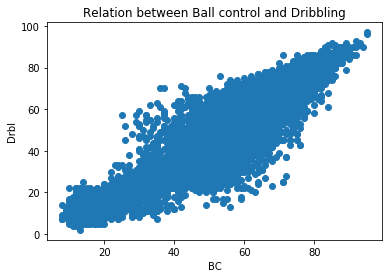

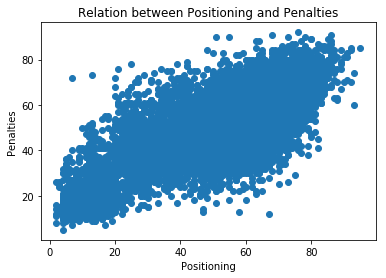

0.932494039131 0.800541599396


In [26]:
x, y, f, e = df['Ball control'], df['Dribbling'], df['Positioning'], df['Penalties']
plt.figure()
plt.scatter(x, y)
plt.title("Relation between Ball control and Dribbling")
plt.xlabel("BC")
plt.ylabel("Drbl")
plt.show()
plt.figure()
plt.scatter(f, e)
plt.title("Relation between Positioning and Penalties")
plt.xlabel("Positioning")
plt.ylabel("Penalties")
plt.show()
pearson1 = sc.pearsonr(x, y)
pearson2 = sc.pearsonr(f, e)
print(pearson1[0], pearson2[0])

### different correlation measures

Beside the Pearson correlation, there are many more correlation measures with different properties. We want to have a closer look at one of them, the so-called Spearman correlation:

https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

Create a scatter plot of the features 'Overall' and 'Value Euro'. In addition, calculate the Pearson as well as the Spearman correlation of the features. For calculation, use for example:

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html

##### Questions:

Can you give a short explanation of the results? 

Can you also imagine dependencies between some features that cannot be detected by both correlation measures? Give a simple example.

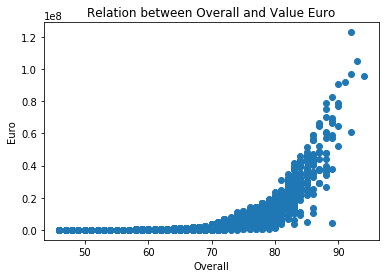

0.627183923664 0.940792782824


In [27]:
x, y = df['Overall'], df['Value Euro']
plt.figure()
plt.scatter(x, y)
plt.title("Relation between Overall and Value Euro")
plt.xlabel("Overall")
plt.ylabel("Euro")
plt.show()
pearson = sc.pearsonr(x,y)
spearman = sc.spearmanr(x,y)
print(pearson[0], spearman[0])

#Spearman coefficient shows the monotonic function, Pearson just linear function. 
#If we have square function, both correlation measures would show inaccurate relation. 

### investigate distributions

Create a histogram of the feature *interceptions* using 100 bins and the parameter *normed = True*. In addition, plot a normal distribution with the same mean and variance as line plot into the same diagram (it is recommended to use different colors).
For plotting the normal distribution you can use:

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linspace.html

https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.stats.norm.html

What do you observe?

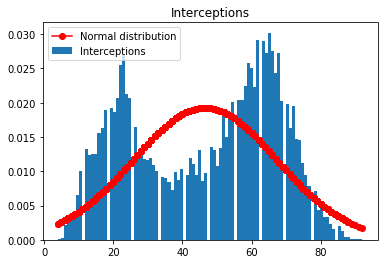

In [52]:
#TODO: Compute mean and standard deviation, plot both charts in one diagram, what can you see?

x = df['Interceptions']
x = sorted(x)
mean = np.mean(x)
std = np.std(x)
normDev = sc.norm.pdf(x, mean, std)
plt.figure()
plt.hist(x, 100, normed = True, label = 'Interceptions')
plt.plot(x,normDev, '-o', color='r', label = 'Normal distribution')
plt.title("Interceptions")
plt.legend()
plt.show()

# Assumption that our values are distributed normally is wrong. So to analyze this data 
# we need another distribution approach


### PCA

A common method for dimensionality reduction is the Principal Component Analysis, which is also known from the lecture:

https://en.wikipedia.org/wiki/Principal_component_analysis

Create scatter plots of the features 'Dribbling' and 'Ball control' before and after applying PCA: 

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Before doing so, apply z-normalization to both features:

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale

What do you observe? Can you name one advantage and one disadvantage of using PCA?

In [3]:
#TODO: Scale the features, apply pca on them and don't forget to comment on the questions.

x, y = df['Ball control'], df['Dribbling']
x = scale(x)
y = scale(y)

C:\Users\z003utev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


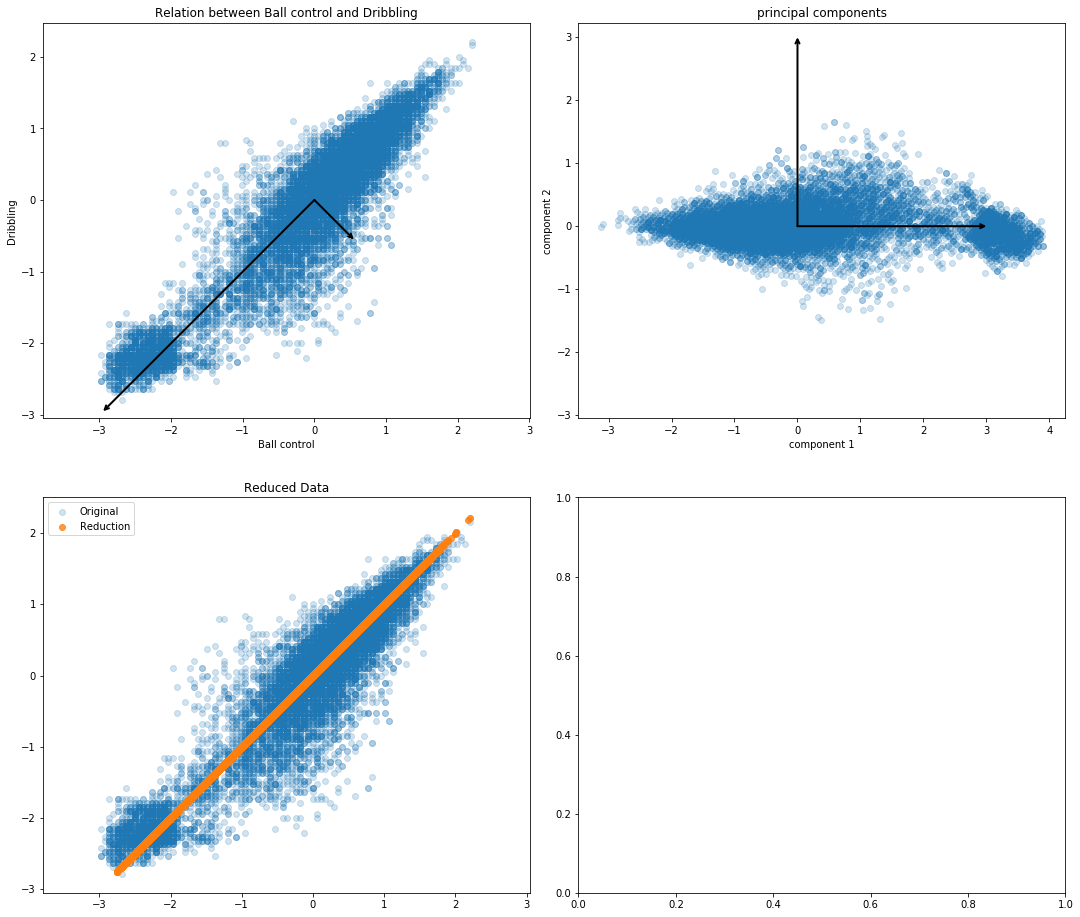

In [36]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

X = np.array([x,y]).T
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax1.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax1)
ax1.axis('equal');
ax1.set(xlabel='Ball control', ylabel='Dribbling', title='Relation between Ball control and Dribbling')

# plot principal components
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax2)
draw_vector([0, 0], [3, 0], ax=ax2)
ax2.axis('equal')
ax2.set(xlabel='component 1', ylabel='component 2',
          title='principal components')

pca1 = PCA(n_components=1)
X_pca1 = pca1.fit_transform(X)
X_new = pca1.inverse_transform(X_pca1)

ax3.scatter(X[:, 0], X[:, 1], alpha=0.2, label="Original")
ax3.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label="Reduction")
ax3.axis('equal')
ax3.set_title('Reduced Data')
ax3.legend()

plt.show()

#What do you observe? Can you name one advantage and one disadvantage of using PCA?
#PCA is a tool to reduce multidimensional data to lower dimensions while retaining most of the information.
#